In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Dataset Description

The dataset contains details regarding absenteeism at work and other associated fatures. It can be used to analyse how absenteeism is related with different features, also a machine learning algorithm can be prepared to predict absenteeism at work.

The reasons for absence are encded on the dataset as per following:

In [3]:
df = pd.read_excel("Absenteeism_at_work.xls")
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,2


In [4]:
df.shape

(740, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   ID                               740 non-null    int64
 1   Reason for absence               740 non-null    int64
 2   Month of absence                 740 non-null    int64
 3   Day of the week                  740 non-null    int64
 4   Seasons                          740 non-null    int64
 5   Transportation expense           740 non-null    int64
 6   Distance from Residence to Work  740 non-null    int64
 7   Service time                     740 non-null    int64
 8   Age                              740 non-null    int64
 9   Work load Average/day            740 non-null    int64
 10  Hit target                       740 non-null    int64
 11  Disciplinary failure             740 non-null    int64
 12  Education                        740 non-null    i

Let's look at distribution of all the features

In [6]:
df["ID"].nunique()

36

In [7]:
df["ID"].value_counts()

3     113
28     76
34     55
22     46
20     42
11     40
15     37
36     34
24     30
14     29
33     24
10     24
1      23
17     20
5      19
18     16
13     15
25     10
6       8
9       8
23      8
27      7
30      7
12      7
7       6
2       6
29      5
26      5
32      5
31      3
19      3
21      3
16      2
8       2
35      1
4       1
Name: ID, dtype: int64

The dataset contains absenteeism information of 36 employees.

Text(0.5, 1.0, 'Number of Days Absent as per employee')

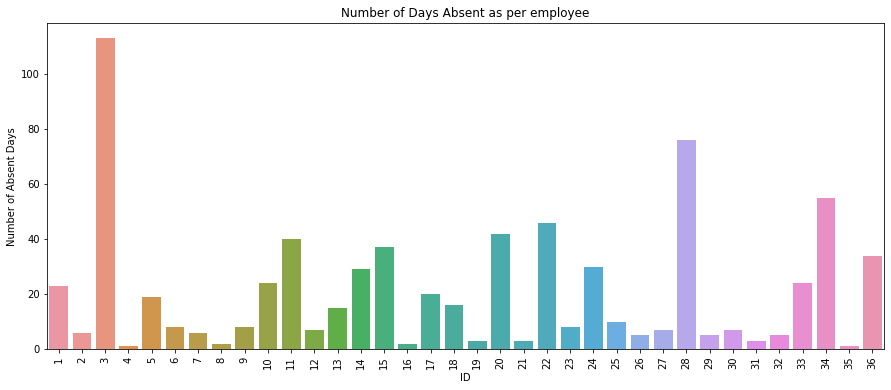

In [8]:
plt.figure(figsize=(15,6))
sns.countplot(df["ID"])
plt.xticks(rotation = 90)
plt.ylabel('Number of Absent Days')
plt.title('Number of Days Absent as per employee')

Highest number of absent days belong to Emp ID 3 followed by Emp ID 28. Let's convert the ID to object type for the model

In [10]:
df["ID"] = df["ID"].astype(str)

Text(0.5, 1.0, 'Number of Days Absent as per Reason for absence')

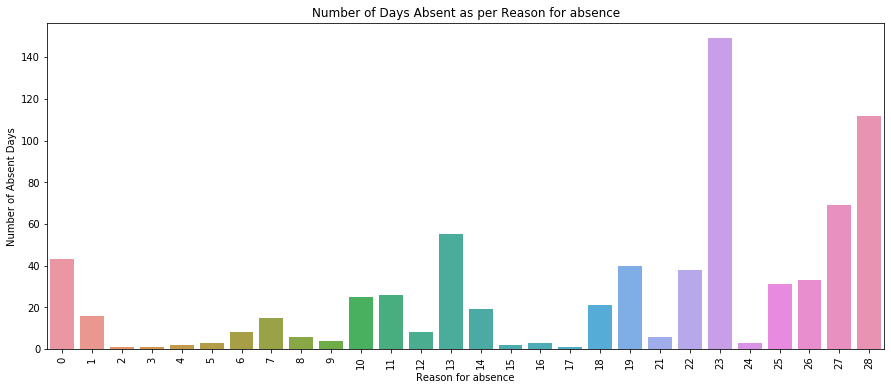

In [11]:
plt.figure(figsize=(15,6))
sns.countplot(df["Reason for absence"])
plt.xticks(rotation = 90)
plt.ylabel('Number of Absent Days')
plt.title('Number of Days Absent as per Reason for absence')

The most common reason for absence is medical consultation (23) followed by dental consultation (28). Let's convert the Reason for absence to object type for the model

In [12]:
df["Reason for absence"] = df["Reason for absence"].astype(str)

3     87
2     72
10    71
7     67
5     64
11    63
8     54
6     54
9     53
4     53
1     50
12    49
0      3
Name: Month of absence, dtype: int64

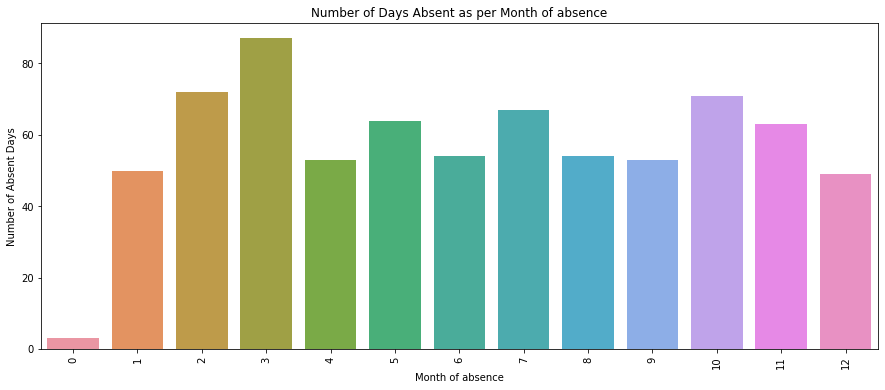

In [13]:
plt.figure(figsize=(15,6))
sns.countplot(df["Month of absence"])
plt.xticks(rotation = 90)
plt.ylabel('Number of Absent Days')
plt.title('Number of Days Absent as per Month of absence')
df["Month of absence"].value_counts()

Highest number of absence is recorded in March followed by February. Also there's garbage value - 0 present in the month column so let's drop it

In [14]:
df.shape

(740, 21)

In [15]:
df = df[df["Month of absence"]!=0]

In [16]:
df.shape

(737, 21)

Let's convert the Month of ansence to object type for the model

In [17]:
df["Month of absence"] = df["Month of absence"].astype(str)

Text(0.5, 1.0, 'Number of Days Absent as per Day of the week')

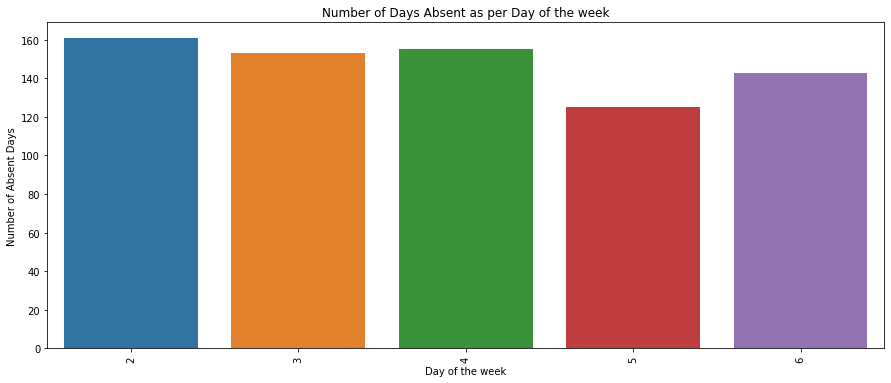

In [18]:
plt.figure(figsize=(15,6))
sns.countplot(df["Day of the week"])
plt.xticks(rotation = 90)
plt.ylabel('Number of Absent Days')
plt.title('Number of Days Absent as per Day of the week')

Highest number of absence is recorded on Mondays followed by Wednesday. Let's convert the day of the week column to object type for the model

In [19]:
df["Day of the week"] = df["Day of the week"].astype(str)

Text(0.5, 1.0, 'Number of Days Absent as per Seasons')

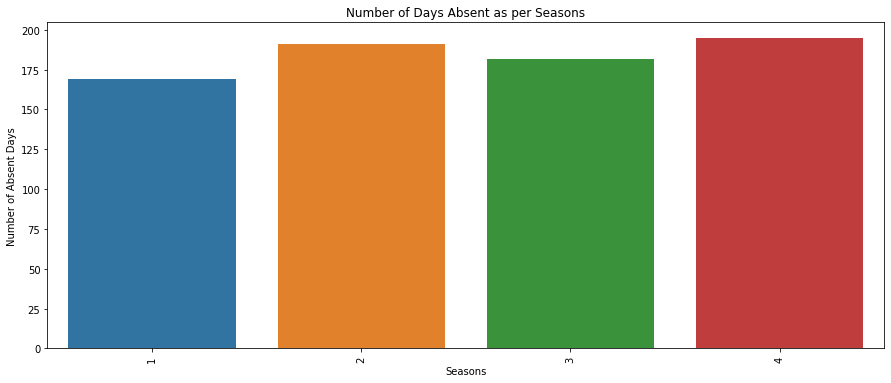

In [20]:
plt.figure(figsize=(15,6))
sns.countplot(df["Seasons"])
plt.xticks(rotation = 90)
plt.ylabel('Number of Absent Days')
plt.title('Number of Days Absent as per Seasons')

Highest number of absence is recorded in the spring season and least in the summer, Let's convert the Seaosn column to object type for the model

In [21]:
df["Seasons"] = df["Seasons"].astype(str)

Text(0.5, 1.0, 'Number of Days Absent as per Transportation expense')

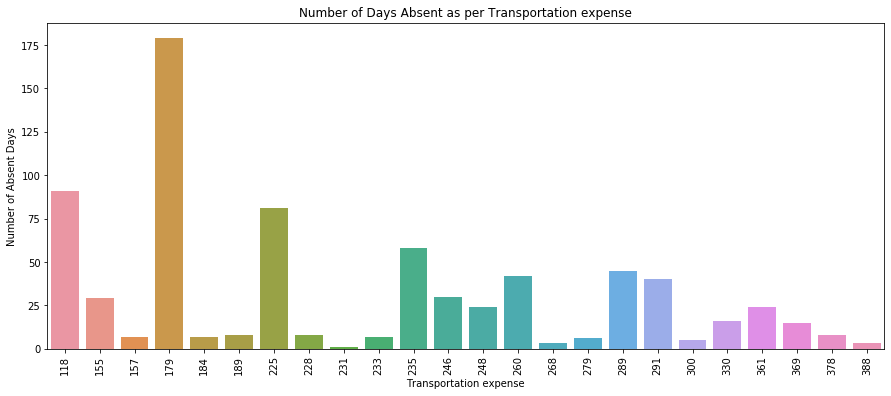

In [24]:
plt.figure(figsize=(15,6))
sns.countplot(df["Transportation expense"])
plt.xticks(rotation = 90)
plt.ylabel('Number of Absent Days')
plt.title('Number of Days Absent as per Transportation expense')

Some Employees with relatively lower transportation expenses have the highest number of absent days

Text(0.5, 1.0, 'Number of Days Absent as per Distance from Residence to Work')

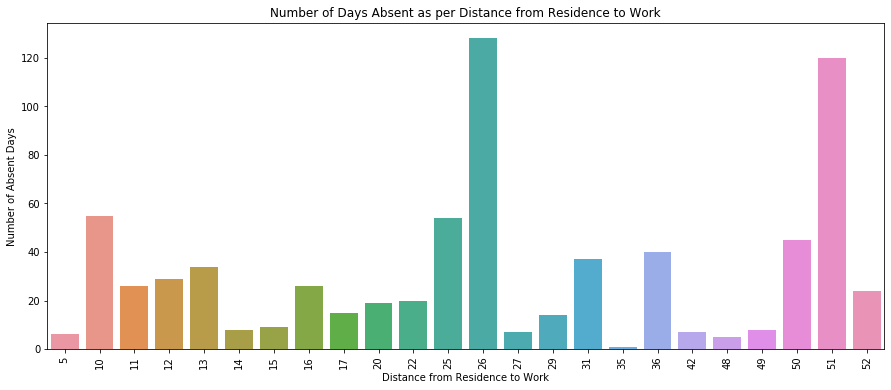

In [25]:
plt.figure(figsize=(15,6))
sns.countplot(df["Distance from Residence to Work"])
plt.xticks(rotation = 90)
plt.ylabel('Number of Absent Days')
plt.title('Number of Days Absent as per Distance from Residence to Work')

Employees who live relatively closer to office have relatively lower absent days.

Text(0.5, 1.0, 'Number of Days Absent as per Service time')

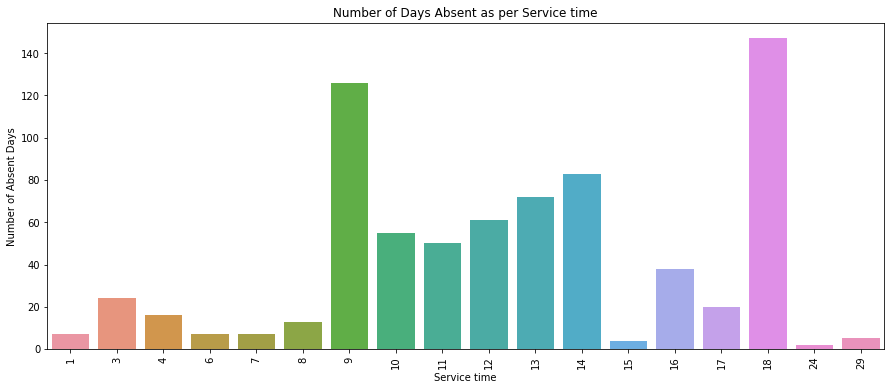

In [26]:
plt.figure(figsize=(15,6))
sns.countplot(df["Service time"])
plt.xticks(rotation = 90)
plt.ylabel('Number of Absent Days')
plt.title('Number of Days Absent as per Service time')

Employees with middle level service time have relatively higher no. of absent days

Text(0.5, 1.0, 'Number of Days Absent as per Age')

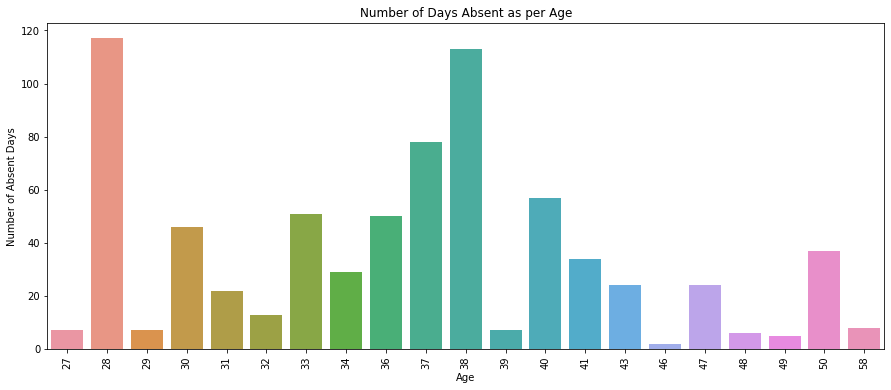

In [28]:
plt.figure(figsize=(15,6))
sns.countplot(df["Age"])
plt.xticks(rotation = 90)
plt.ylabel('Number of Absent Days')
plt.title('Number of Days Absent as per Age')

Relatively younger employees have higher no. of absent days compared to people over 39 years of age

Text(0.5, 1.0, 'Number of Days Absent as per Work load Average/day')

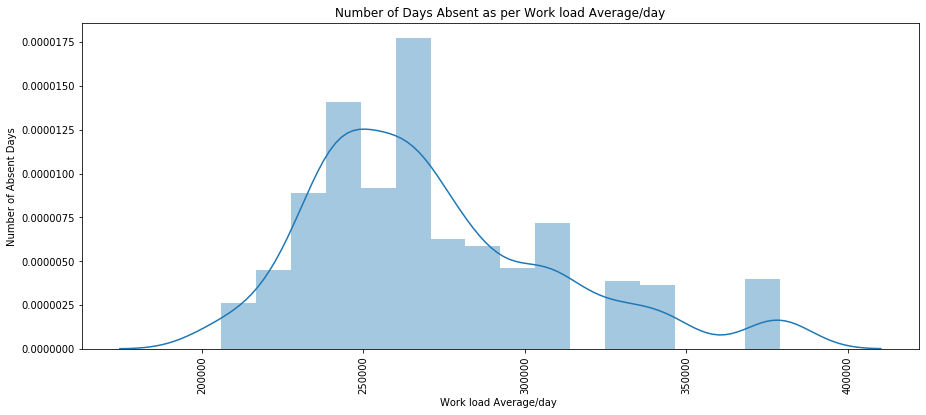

In [29]:
plt.figure(figsize=(15,6))
sns.distplot(df["Work load Average/day "])
plt.xticks(rotation = 90)
plt.ylabel('Number of Absent Days')
plt.title('Number of Days Absent as per Work load Average/day')

Employees with mid level work load have relatively higher no. of absent days

Text(0.5, 1.0, 'Number of Days Absent as per Hit target')

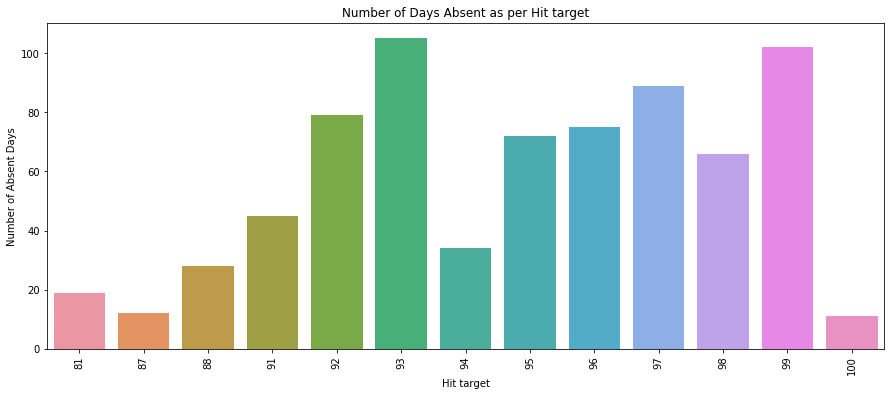

In [30]:
plt.figure(figsize=(15,6))
sns.countplot(df["Hit target"])
plt.xticks(rotation = 90)
plt.ylabel('Number of Absent Days')
plt.title('Number of Days Absent as per Hit target')

Employees having relatively higher hit target have relatively higher no. of absent days

0    697
1     40
Name: Disciplinary failure, dtype: int64

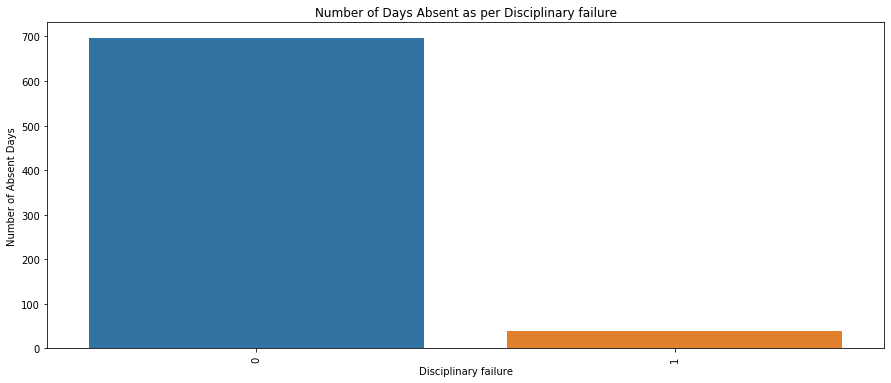

In [32]:
plt.figure(figsize=(15,6))
sns.countplot(df["Disciplinary failure"])
plt.xticks(rotation = 90)
plt.ylabel('Number of Absent Days')
plt.title('Number of Days Absent as per Disciplinary failure')
df["Disciplinary failure"].value_counts()

Out of total absent days, 40 cases are disciplinary failures

Text(0.5, 1.0, 'Number of Days Absent as per Education')

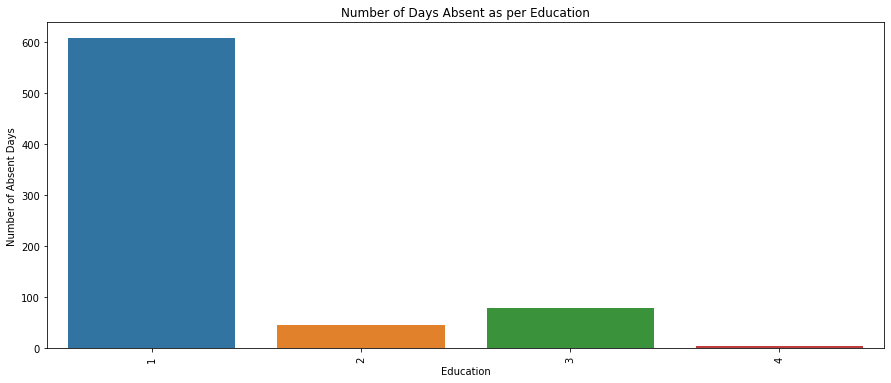

In [33]:
plt.figure(figsize=(15,6))
sns.countplot(df["Education"])
plt.xticks(rotation = 90)
plt.ylabel('Number of Absent Days')
plt.title('Number of Days Absent as per Education')

Majority of the absent days belong to employees who are high school educated and least to masters & doctors.

Text(0.5, 1.0, 'Number of Days Absent as per Son')

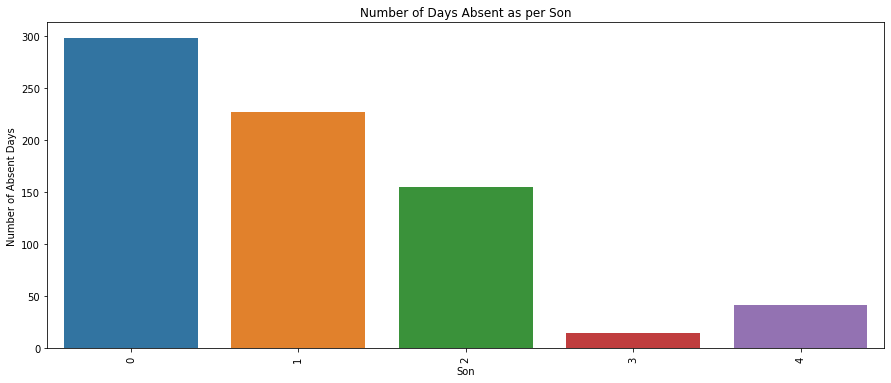

In [34]:
plt.figure(figsize=(15,6))
sns.countplot(df["Son"])
plt.xticks(rotation = 90)
plt.ylabel('Number of Absent Days')
plt.title('Number of Days Absent as per Son')

Highest number of absent days belong to employees who don't have children

Text(0.5, 1.0, 'Number of Days Absent as per Social drinker')

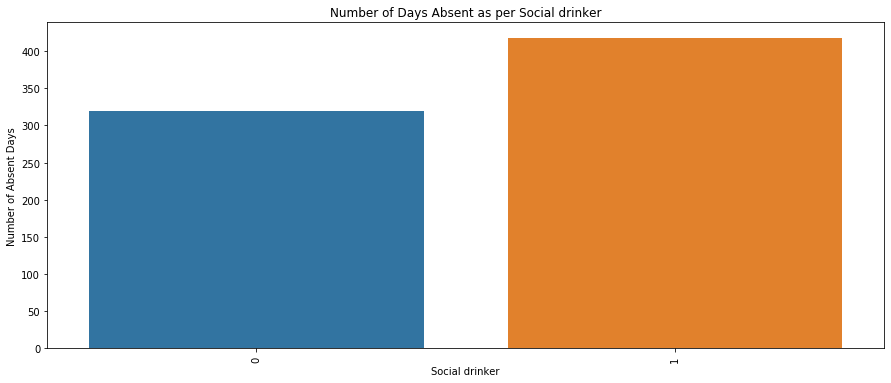

In [35]:
plt.figure(figsize=(15,6))
sns.countplot(df["Social drinker"])
plt.xticks(rotation = 90)
plt.ylabel('Number of Absent Days')
plt.title('Number of Days Absent as per Social drinker')

Majority of the absent days belong to employees who are social drinkers.

Text(0.5, 1.0, 'Number of Days Absent as per Social smoker')

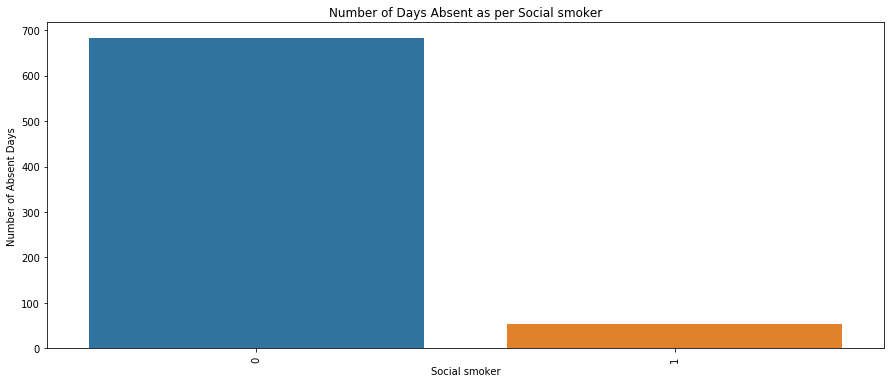

In [36]:
plt.figure(figsize=(15,6))
sns.countplot(df["Social smoker"])
plt.xticks(rotation = 90)
plt.ylabel('Number of Absent Days')
plt.title('Number of Days Absent as per Social smoker')

Majority of the absent days belong to employees who are not social smokers.

Text(0.5, 1.0, 'Number of Days Absent as per Pet')

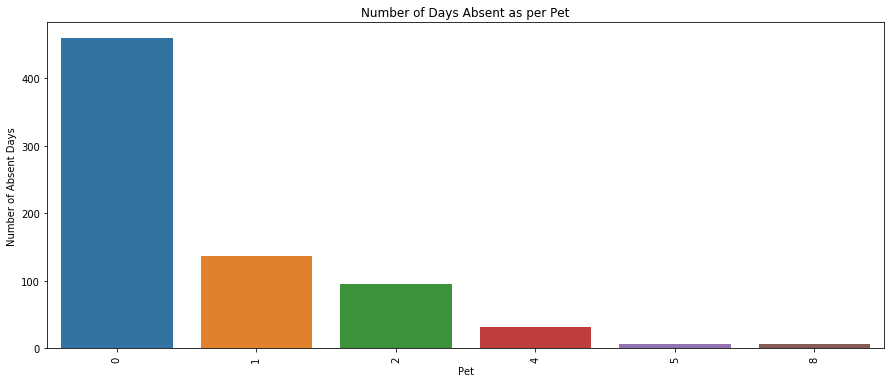

In [37]:
plt.figure(figsize=(15,6))
sns.countplot(df["Pet"])
plt.xticks(rotation = 90)
plt.ylabel('Number of Absent Days')
plt.title('Number of Days Absent as per Pet')

Highest number of absent days belong to employees who don't have any pet

Text(0.5, 1.0, 'Number of Days Absent as per Body mass index')

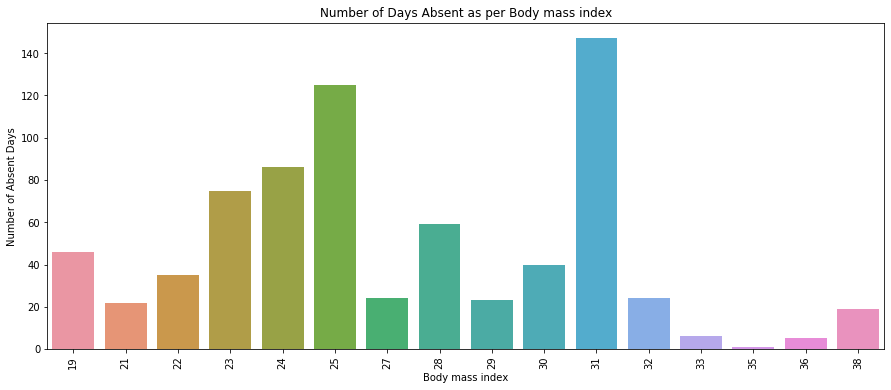

In [39]:
plt.figure(figsize=(15,6))
sns.countplot(df["Body mass index"])
plt.xticks(rotation = 90)
plt.ylabel('Number of Absent Days')
plt.title('Number of Days Absent as per Body mass index')

Highest number of absent days belong to employees who have relatively lower BMI.

Text(0.5, 1.0, 'Number of Days Absent as per Absenteeism time in hours')

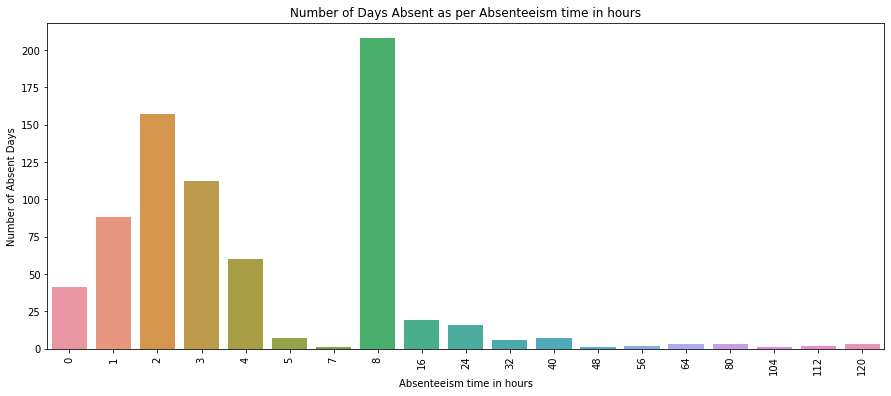

In [42]:
plt.figure(figsize=(15,6))
sns.countplot(df["Absenteeism time in hours"])
plt.xticks(rotation = 90)
plt.ylabel('Number of Absent Days')
plt.title('Number of Days Absent as per Absenteeism time in hours')

The distribution of Absenteeism time is skewed to the righ or very few employees have higher Absenteeism.

Let's look at absenteeism time as per different features in the dataset - Bivariate analysis

Text(0.5, 1.0, 'Employee ID vs Absenteeism time in hours - Boxplot')

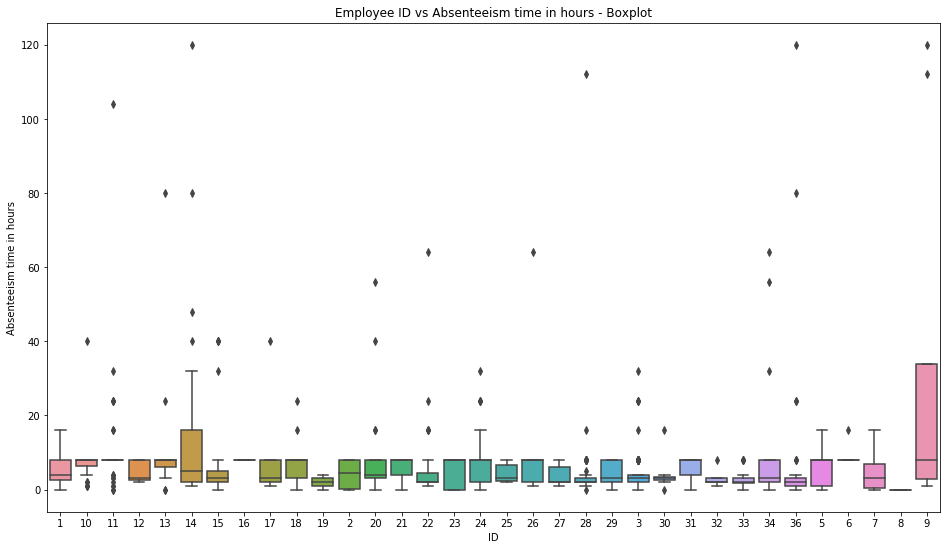

In [43]:
plt.figure(figsize=(16,9))
sns.boxplot(x="ID", y="Absenteeism time in hours",data=df)
plt.title('Employee ID vs Absenteeism time in hours - Boxplot')

Employee ID 9 followed by 6 have the highest absenteeism time in hours.

Text(0.5, 1.0, 'Reason for absence vs Absenteeism time in hours - Boxplot')

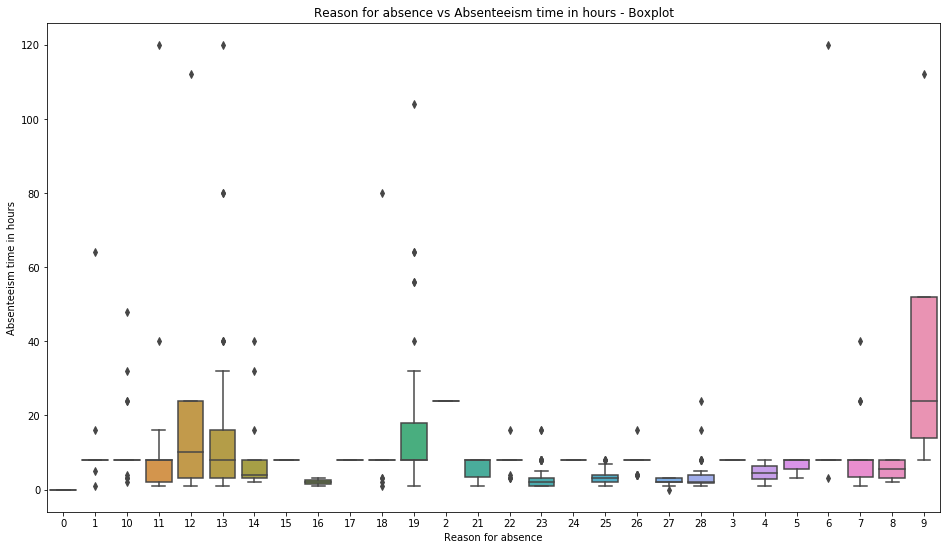

In [44]:
plt.figure(figsize=(16,9))
sns.boxplot(x="Reason for absence", y="Absenteeism time in hours",data=df)
plt.title('Reason for absence vs Absenteeism time in hours - Boxplot')

Diseases of the circulatory system (9) followed by Neoplasms have the highest number of median absenteeism time in hours.

Text(0.5, 1.0, 'Month of absence vs Absenteeism time in hours - Boxplot')

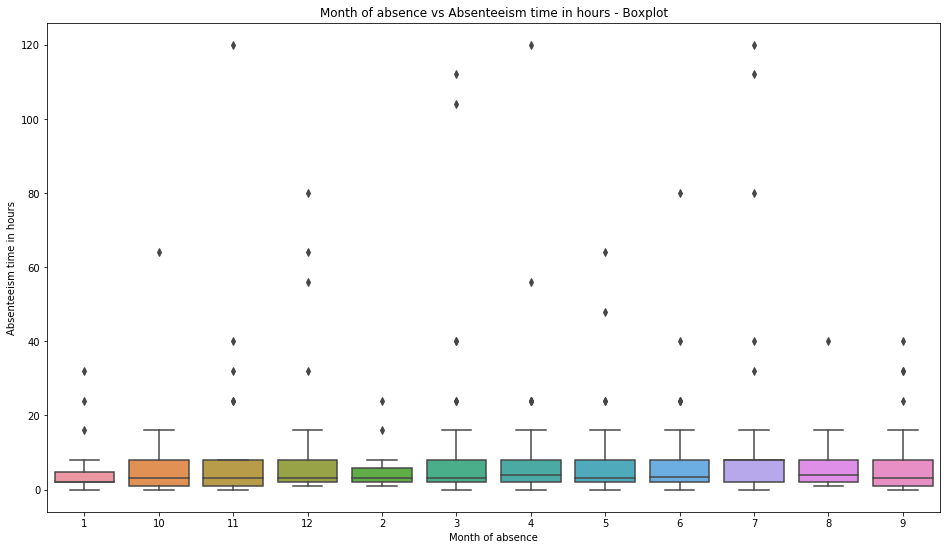

In [46]:
plt.figure(figsize=(16,9))
sns.boxplot(x="Month of absence", y="Absenteeism time in hours",data=df)
plt.title('Month of absence vs Absenteeism time in hours - Boxplot')

Median absenteeism time in hours has no relationship with month of absence.

Text(0.5, 1.0, 'Day of the week vs Absenteeism time in hours - Boxplot')

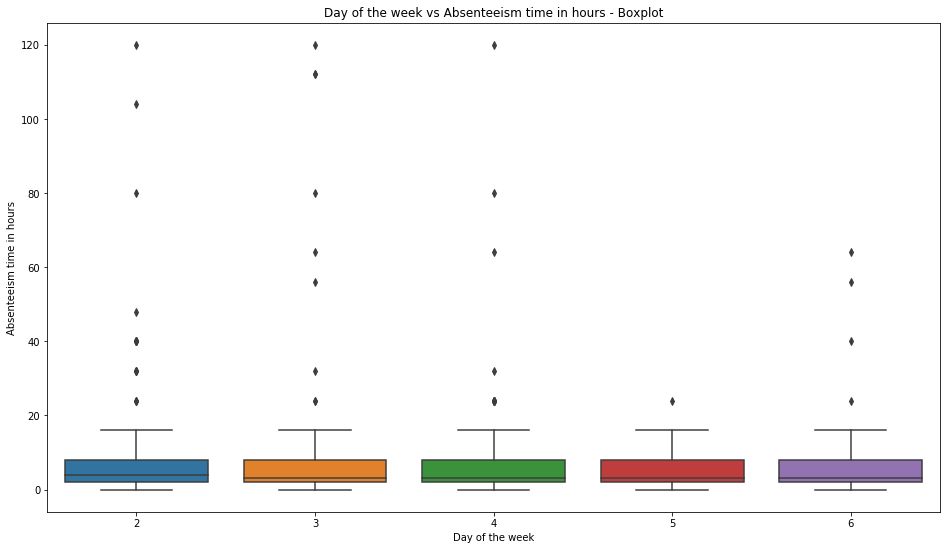

In [47]:
plt.figure(figsize=(16,9))
sns.boxplot(x="Day of the week", y="Absenteeism time in hours",data=df)
plt.title('Day of the week vs Absenteeism time in hours - Boxplot')

Median absenteeism time in hours has no relationship with day of the week of absence.

Text(0.5, 1.0, 'Seasons vs Absenteeism time in hours - Boxplot')

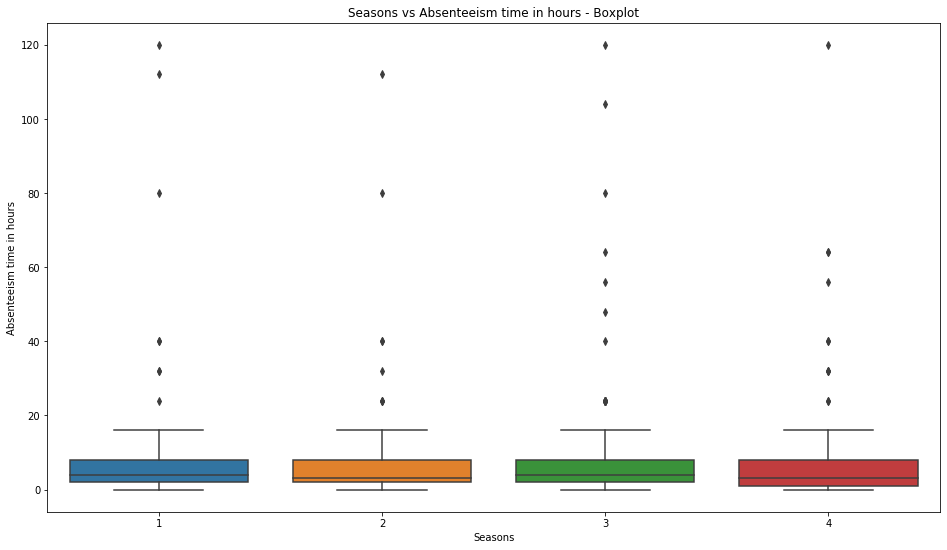

In [48]:
plt.figure(figsize=(16,9))
sns.boxplot(x="Seasons", y="Absenteeism time in hours",data=df)
plt.title('Seasons vs Absenteeism time in hours - Boxplot')

Median absenteeism time in hours has no relationship with season of absence.

Text(0.5, 1.0, 'Disciplinary failure vs Absenteeism time in hours - Boxplot')

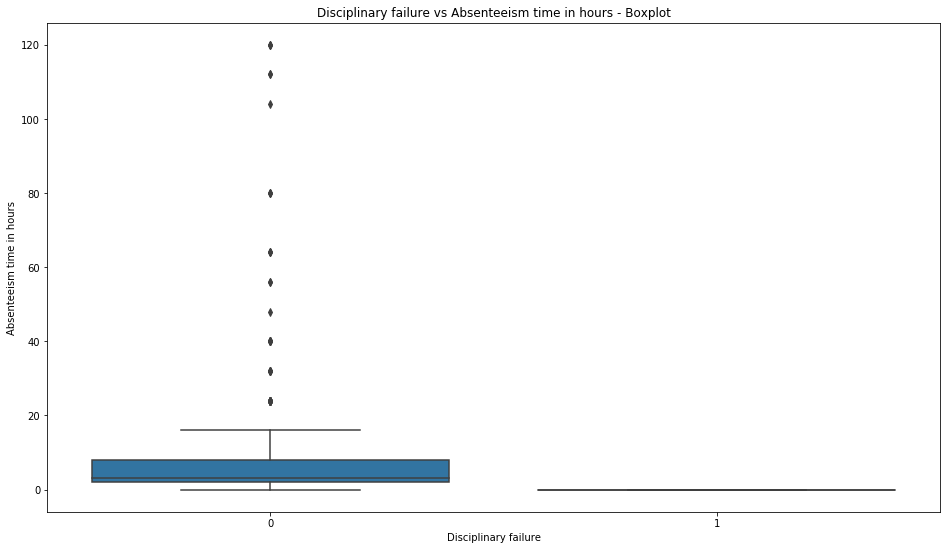

In [49]:
plt.figure(figsize=(16,9))
sns.boxplot(x="Disciplinary failure", y="Absenteeism time in hours",data=df)
plt.title('Disciplinary failure vs Absenteeism time in hours - Boxplot')

Median absenteeism time in hours associated with disciplinary failure is very low.

Text(0.5, 1.0, 'Education vs Absenteeism time in hours - Boxplot')

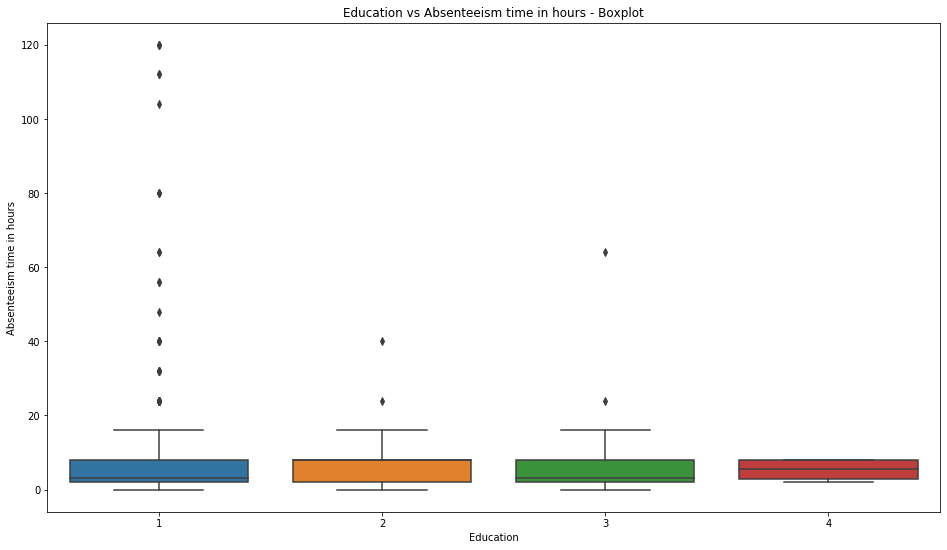

In [50]:
plt.figure(figsize=(16,9))
sns.boxplot(x="Education", y="Absenteeism time in hours",data=df)
plt.title('Education vs Absenteeism time in hours - Boxplot')

Median absenteeism time in hours is slightly higher for Masters/Doctors level educated. Also higher outlier absenteeism time is present mostly with high school educated and not at all present at masters/doctors level of education.

Text(0.5, 1.0, 'Number of Children vs Absenteeism time in hours - Boxplot')

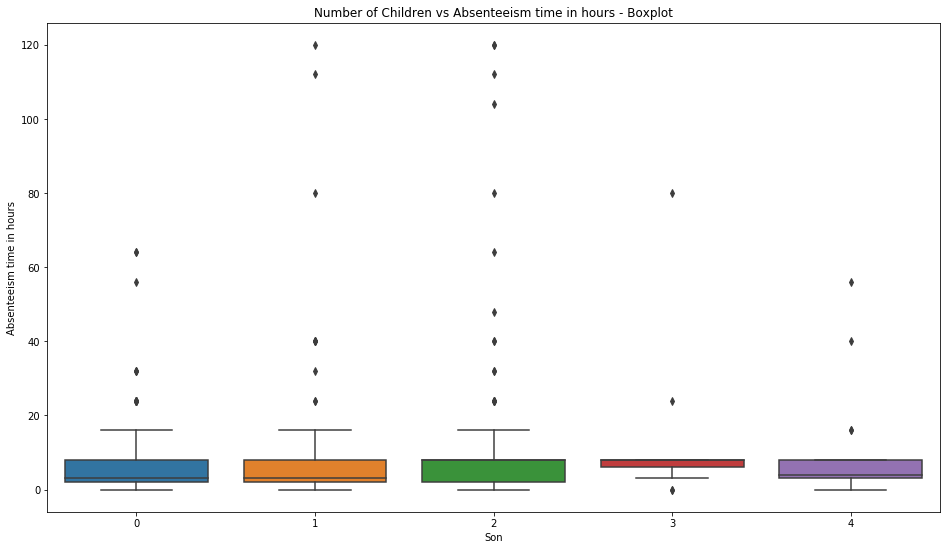

In [63]:
plt.figure(figsize=(16,9))
sns.boxplot(x="Son", y="Absenteeism time in hours",data=df)
plt.title('Number of Children vs Absenteeism time in hours - Boxplot')

Median absenteeism time in hours has no relationship with number of children.

Text(0.5, 1.0, 'Social drinker vs Absenteeism time in hours - Boxplot')

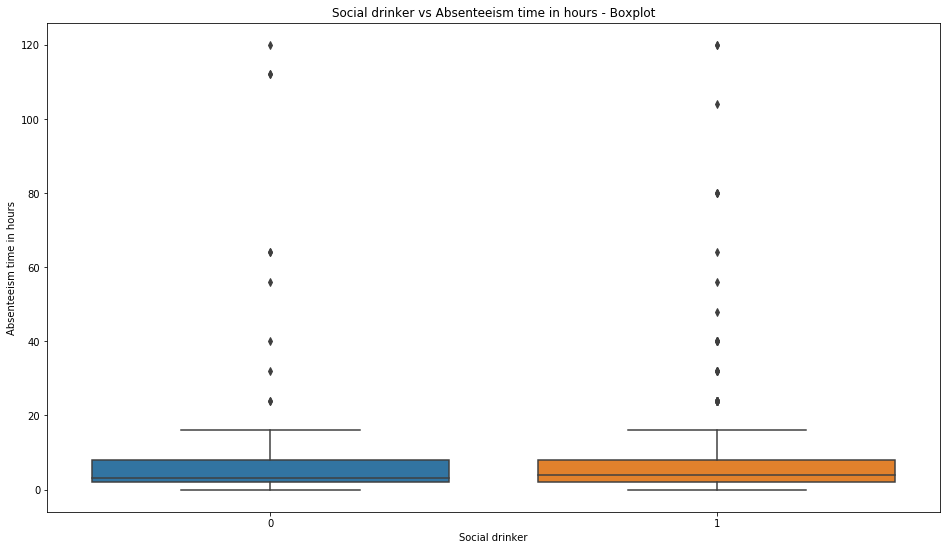

In [51]:
plt.figure(figsize=(16,9))
sns.boxplot(x="Social drinker", y="Absenteeism time in hours",data=df)
plt.title('Social drinker vs Absenteeism time in hours - Boxplot')

Median absenteeism time in hours has no relationship with social drinking.

Text(0.5, 1.0, 'Social smoker vs Absenteeism time in hours - Boxplot')

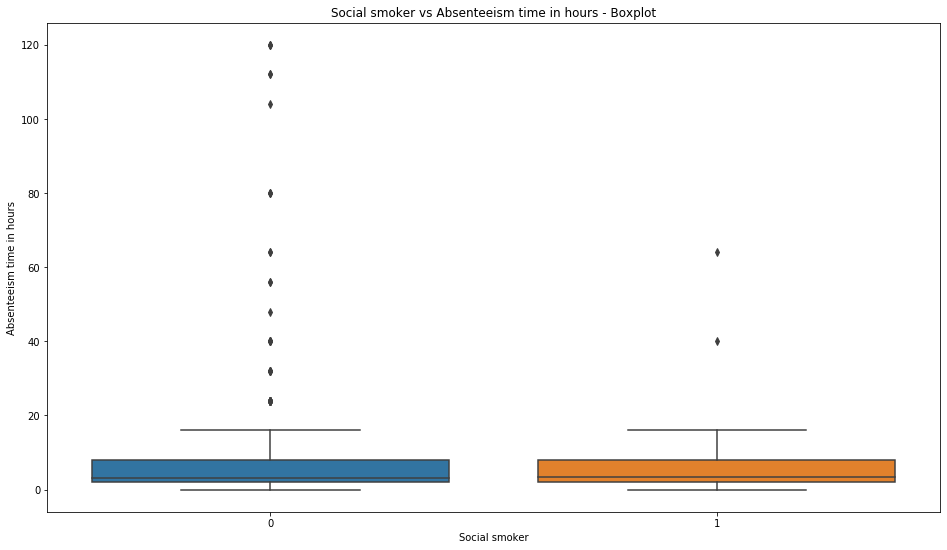

In [52]:
plt.figure(figsize=(16,9))
sns.boxplot(x="Social smoker", y="Absenteeism time in hours",data=df)
plt.title('Social smoker vs Absenteeism time in hours - Boxplot')

Median absenteeism time in hours has no relationship with social smoking.

Text(0.5, 1.0, 'Number of Pets vs Absenteeism time in hours - Boxplot')

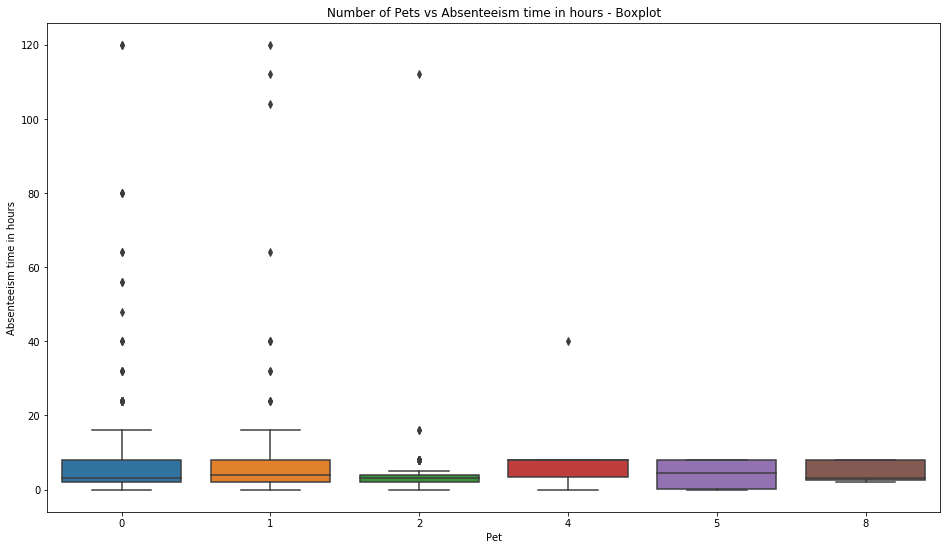

In [53]:
plt.figure(figsize=(16,9))
sns.boxplot(x="Pet", y="Absenteeism time in hours",data=df)
plt.title('Number of Pets vs Absenteeism time in hours - Boxplot')

Median absenteeism time in hours has no relationship with number of pets.

Let us look at the scatterplots of absenteeism time in hours vs continuous variables in the dataset.

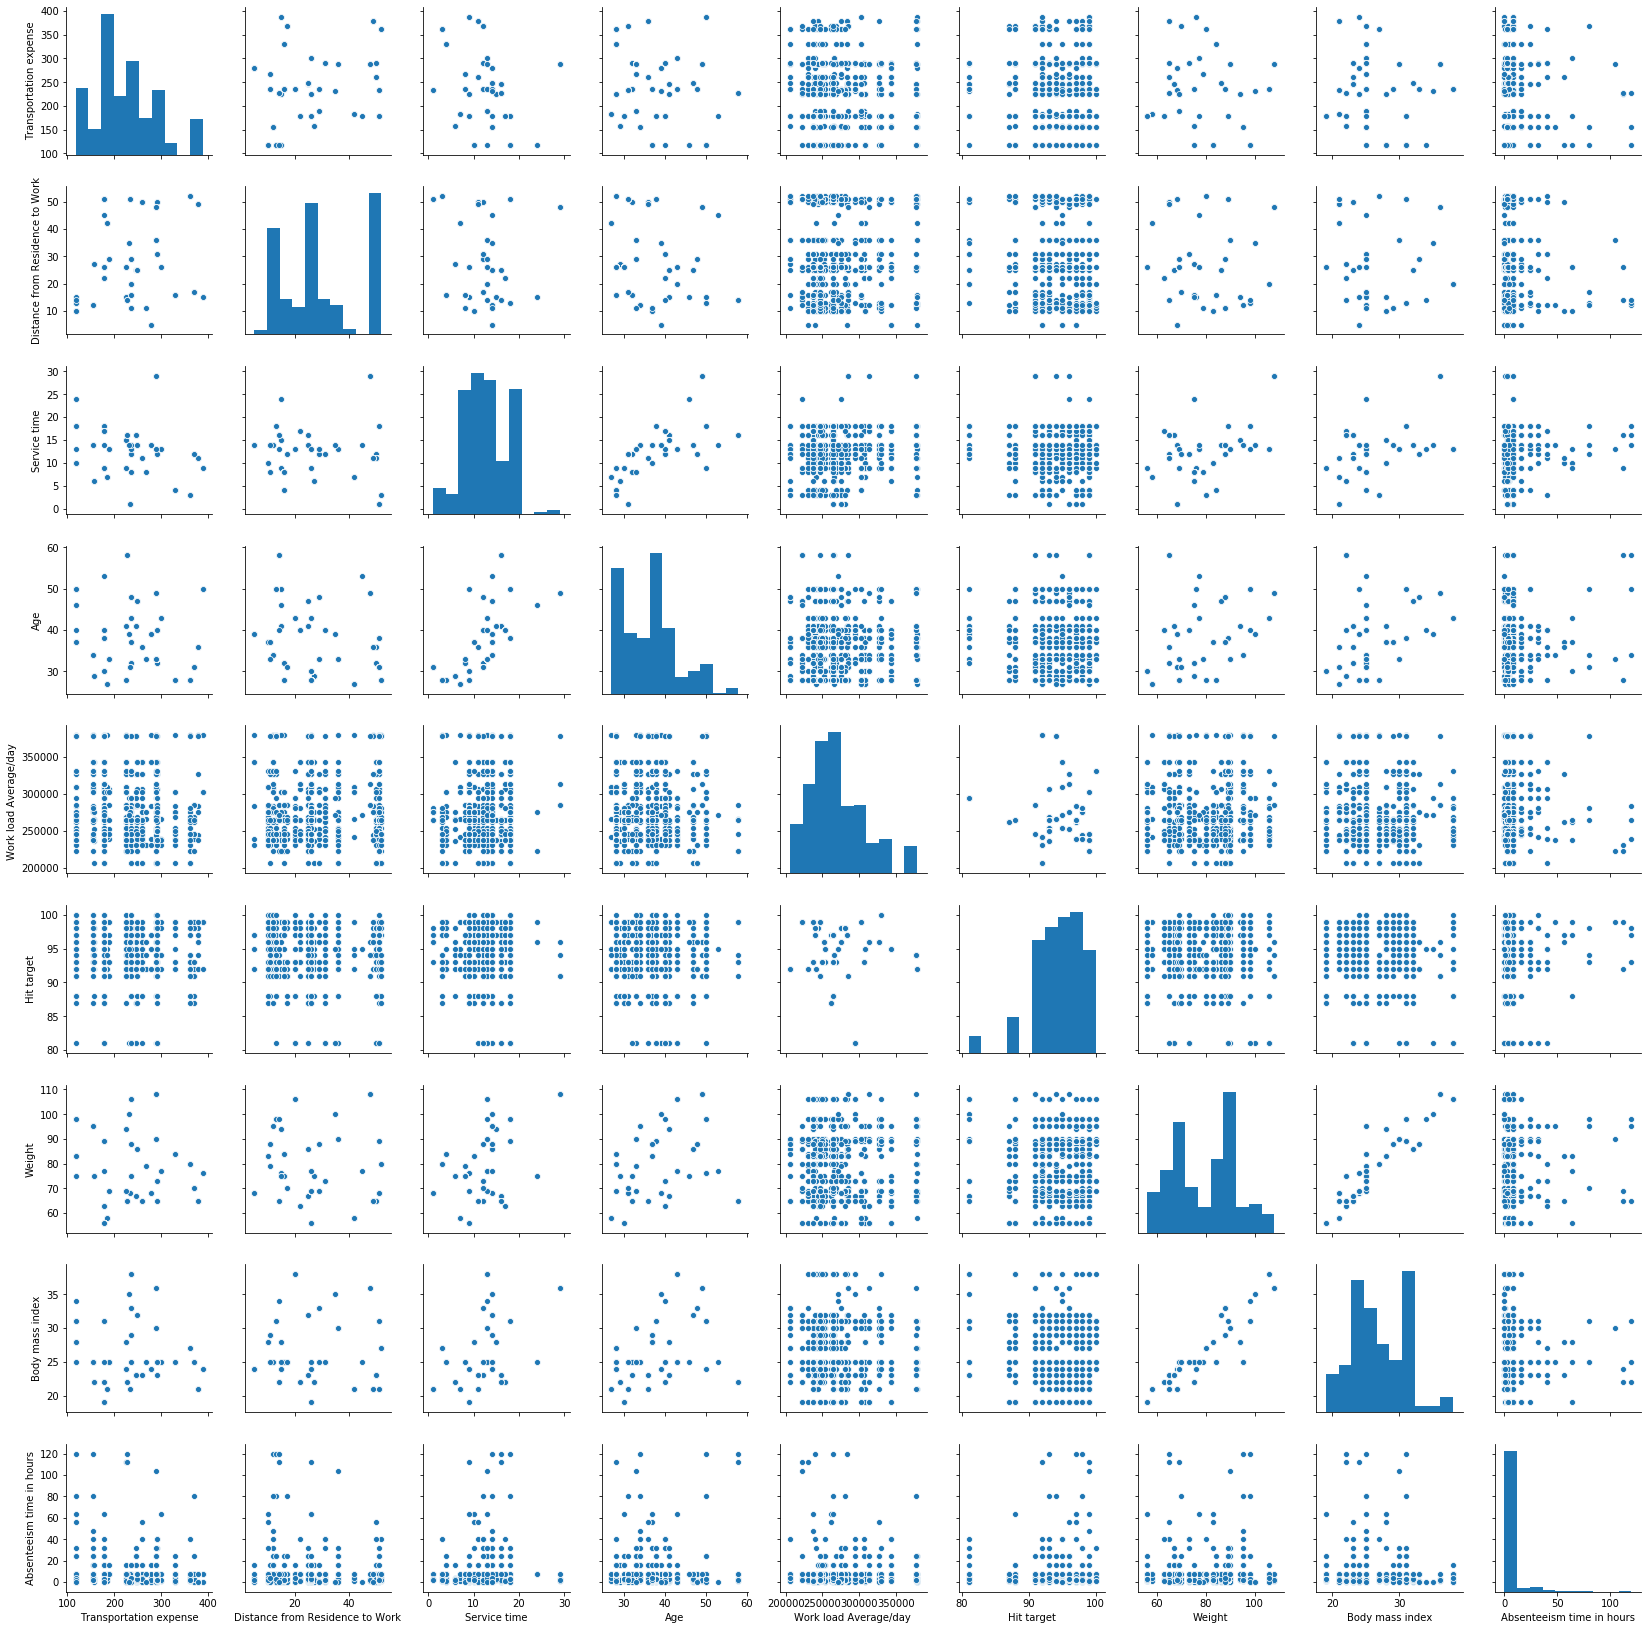

In [68]:
sns.pairplot(df[["Transportation expense","Distance from Residence to Work","Service time","Age","Work load Average/day ","Hit target","Weight","Body mass index","Absenteeism time in hours"]])

In [54]:
cor = df[["Transportation expense","Distance from Residence to Work","Service time","Age","Work load Average/day ","Hit target","Weight","Body mass index","Absenteeism time in hours"]].corr()
cor

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Weight,Body mass index,Absenteeism time in hours
Transportation expense,1.000000,0.261707,-0.350174,-0.225775,0.005429,-0.080046,-0.205870,-0.134531,0.026215
Distance from Residence to Work,0.261707,1.000000,0.131477,-0.149825,-0.068781,-0.013938,-0.046564,0.116527,-0.088307
Service time,-0.350174,0.131477,1.000000,0.672880,-0.000661,-0.007954,0.456684,0.501195,0.019580
Age,-0.225775,-0.149825,0.672880,1.000000,-0.039580,-0.039933,0.420672,0.474164,0.068590
Work load Average/day,0.005429,-0.068781,-0.000661,-0.039580,1.000000,-0.089444,-0.038621,-0.091102,0.024748
Hit target,-0.080046,-0.013938,-0.007954,-0.039933,-0.089444,1.000000,-0.045534,-0.089843,0.026941
Weight,-0.205870,-0.046564,0.456684,0.420672,-0.038621,-0.045534,1.000000,0.903495,0.017934
Body mass index,-0.134531,0.116527,0.501195,0.474164,-0.091102,-0.089843,0.903495,1.000000,-0.047667
Absenteeism time in hours,0.026215,-0.088307,0.019580,0.068590,0.024748,0.026941,0.017934,-0.047667,1.000000


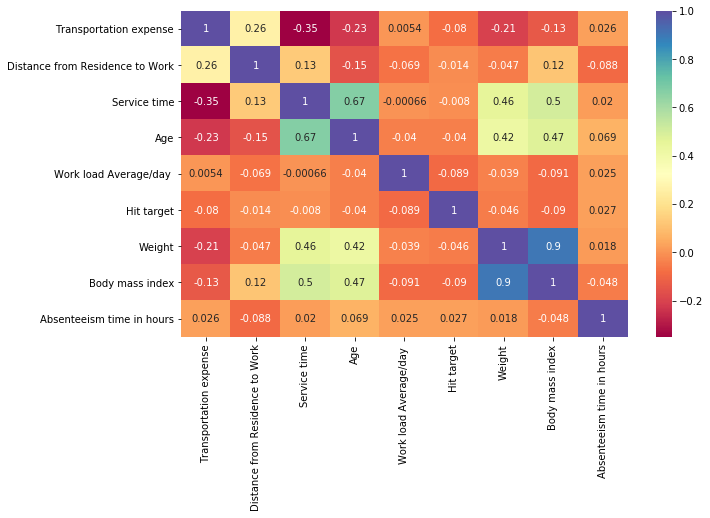

In [55]:
plt.figure(figsize=(10,6))
sns.heatmap(cor,cmap='Spectral',annot=True)

Absenteeism time in hours does not have much correlation with the features.

In [56]:
#Checking for null values
df.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

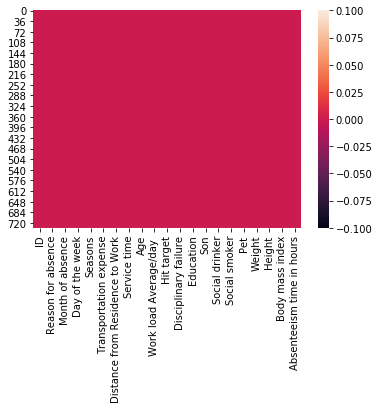

In [57]:
sns.heatmap(df.isnull())

In [58]:
df.skew()

ID                                 0.012958
Reason for absence                -0.921765
Month of absence                   0.073898
Day of the week                    0.102439
Seasons                           -0.040918
Transportation expense             0.394709
Distance from Residence to Work    0.314339
Service time                      -0.001710
Age                                0.697404
Work load Average/day              0.959429
Hit target                        -1.257923
Disciplinary failure               3.942796
Education                          2.102144
Son                                1.088565
Social drinker                    -0.271667
Social smoker                      3.281926
Pet                                2.698853
Weight                             0.018906
Height                             2.562402
Body mass index                    0.305228
Absenteeism time in hours          5.712817
dtype: float64

In [59]:
df.drop("Height",axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 737 entries, 0 to 736
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   ID                               737 non-null    object
 1   Reason for absence               737 non-null    object
 2   Month of absence                 737 non-null    object
 3   Day of the week                  737 non-null    object
 4   Seasons                          737 non-null    object
 5   Transportation expense           737 non-null    int64 
 6   Distance from Residence to Work  737 non-null    int64 
 7   Service time                     737 non-null    int64 
 8   Age                              737 non-null    int64 
 9   Work load Average/day            737 non-null    int64 
 10  Hit target                       737 non-null    int64 
 11  Disciplinary failure             737 non-null    int64 
 12  Education                        737

In [60]:
cat = pd.get_dummies(df)
cat

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,...,Month of absence_9,Day of the week_2,Day of the week_3,Day of the week_4,Day of the week_5,Day of the week_6,Seasons_1,Seasons_2,Seasons_3,Seasons_4
0,289,36,13,33,239554,97,0,1,2,1,...,0,0,1,0,0,0,1,0,0,0
1,118,13,18,50,239554,97,1,1,1,1,...,0,0,1,0,0,0,1,0,0,0
2,179,51,18,38,239554,97,0,1,0,1,...,0,0,0,1,0,0,1,0,0,0
3,279,5,14,39,239554,97,0,1,2,1,...,0,0,0,0,1,0,1,0,0,0
4,289,36,13,33,239554,97,0,1,2,1,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,361,52,3,28,264604,93,0,1,1,1,...,0,0,0,1,0,0,1,0,0,0
733,225,26,9,28,264604,93,0,1,1,0,...,0,0,0,1,0,0,1,0,0,0
734,369,17,12,31,264604,93,0,1,3,1,...,0,1,0,0,0,0,1,0,0,0
735,289,36,13,33,264604,93,0,1,2,1,...,0,0,1,0,0,0,1,0,0,0


In [61]:
cat.shape

(737, 98)

In [62]:
cat.columns

Index(['Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Body mass index',
       'Absenteeism time in hours', 'ID_1', 'ID_10', 'ID_11', 'ID_12', 'ID_13',
       'ID_14', 'ID_15', 'ID_16', 'ID_17', 'ID_18', 'ID_19', 'ID_2', 'ID_20',
       'ID_21', 'ID_22', 'ID_23', 'ID_24', 'ID_25', 'ID_26', 'ID_27', 'ID_28',
       'ID_29', 'ID_3', 'ID_30', 'ID_31', 'ID_32', 'ID_33', 'ID_34', 'ID_36',
       'ID_5', 'ID_6', 'ID_7', 'ID_8', 'ID_9', 'Reason for absence_0',
       'Reason for absence_1', 'Reason for absence_10',
       'Reason for absence_11', 'Reason for absence_12',
       'Reason for absence_13', 'Reason for absence_14',
       'Reason for absence_15', 'Reason for absence_16',
       'Reason for absence_17', 'Reason for absence_18',
       'Reason for absence_19', 'Reason for absence_2',
       

In [64]:
cat.drop(["ID_1","Reason for absence_0","Month of absence_1","Day of the week_2","Seasons_1"],axis=1,inplace=True)
cat.shape

(737, 93)

In [69]:
X=cat.drop("Absenteeism time in hours", axis=1)
y=cat["Absenteeism time in hours"]

In [70]:
from sklearn.preprocessing import StandardScaler
X2 = StandardScaler().fit_transform(X)
X2

array([[ 1.00852185,  0.42982395,  0.1026106 , ..., -0.59145317,
        -0.57264992, -0.59981547],
       [-1.54693954, -1.12070717,  1.2415265 , ..., -0.59145317,
        -0.57264992, -0.59981547],
       [-0.6353422 ,  1.44103989,  1.2415265 , ..., -0.59145317,
        -0.57264992, -0.59981547],
       ...,
       [ 2.20405935, -0.85104958, -0.12517257, ..., -0.59145317,
        -0.57264992, -0.59981547],
       [ 1.00852185,  0.42982395,  0.1026106 , ..., -0.59145317,
        -0.57264992, -0.59981547],
       [ 0.20153404, -1.25553596,  0.33039378, ..., -0.59145317,
        -0.57264992, -0.59981547]])

Finding best random_state for Linear Regression Model

In [71]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
max_r2_score=0
for r_state in range(0,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25,random_state=r_state)
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    y_pred = lr.predict(X_test)
    r2_scr = r2_score(y_test,y_pred)
    if r2_scr>max_r2_score:
        max_r2_score = r2_scr
        final_r_state = r_state
    
print("max R2 score corresponding to random state",final_r_state,"is",max_r2_score)

max R2 score corresponding to random state 0 is 0.23364044188143618


In [72]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25,random_state=0)

In [73]:
print(X_train.shape,"\n",X_test.shape)

(552, 92) 
 (185, 92)


Observing performance of different algorithms

In [74]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

In [75]:
LR = LinearRegression()
RR = Ridge()
LSR = Lasso()
KNR = KNeighborsRegressor()#(n_neighbors=2)
SV = SVR()
DTC = DecisionTreeRegressor()
RFC = RandomForestRegressor()
ABC = AdaBoostRegressor()#(n_estimators=100,base_estimator=SV,algorithm='SAMME')
GBC = GradientBoostingRegressor()
XGB = xgb.XGBRegressor()# From the GridSearchCV parameter tuning

In [76]:
models = []
models.append(("LinearRegression", LR))
models.append(("Ridge", RR))
models.append(("Lasso", LSR))
models.append(("KNeighborsRegressor", KNR))
models.append(("SVR", SV))
models.append(("DecisionTreeRegressor", DTC))
models.append(("RandomForestRegressor", RFC))
models.append(("AdaBoostRegressor", ABC))
models.append(("GradientBoostingRegressor", GBC))
models.append(("XGBoostRegressor", XGB))

In [77]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf = KFold(n_splits=4, random_state=91, shuffle=True)

In [78]:
Model = []
score = []
cvs = []
MSE = []
MAE = []
for name,model in models:
    print("*****************",name,"******************\n")
    Model.append(name)
    model.fit(X_train,y_train)
    print(model)
    pre = model.predict(X_test)
    print("\n")
    R2 = r2_score(y_test,pre)
    print("R2 Score = ",R2)
    score.append(R2)
    print("\n")
    sc = cross_val_score(model,X,y,cv=kf,scoring="r2").mean()
    print("Cross val score = ",sc)
    cvs.append(sc)
    print("\n")
    mse = mean_squared_error(y_test,pre)
    print("Mean Squared error\n", mse)
    MSE.append(mse)
    print("\n")
    mae = mean_absolute_error(y_test,pre)
    print("Mean absolute error \n{}".format(mae))
    MAE.append(mae)
    print("\n\n")

***************** LinearRegression ******************

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


R2 Score =  0.23364044188143618


Cross val score =  -0.05377605446116471


Mean Squared error
 108.12734384244179


Mean absolute error 
5.744905029100923



***************** Ridge ******************

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)


R2 Score =  0.23844390069815602


Cross val score =  0.023882816037338772


Mean Squared error
 107.44961334687183


Mean absolute error 
5.526583457334216



***************** Lasso ******************

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


R2 Score =  0.05723404262593523


Cross val score =  -0.006710498018365235


Mean Squared error
 133.0169079983776


Mean a

In [79]:
result = pd.DataFrame({"Model": Model, "R2 Socre": score, "Cross val score": cvs, "Mean Squared Error": MSE, "Mean Absolute Error": MAE})
result

,Model,R2 Socre,Cross val score,Mean Squared Error,Mean Absolute Error
0,LinearRegression,0.233640,-0.053776,108.127344,5.744905
1,Ridge,0.238444,0.023883,107.449613,5.526583
2,Lasso,0.057234,-0.006710,133.016908,5.578601
3,KNeighborsRegressor,-0.198270,-0.215440,169.066595,6.040000
4,SVR,-0.088214,-0.081368,153.538458,4.922595
5,DecisionTreeRegressor,-0.771096,-0.425351,249.887838,5.640541
6,RandomForestRegressor,0.146728,-0.049365,120.390040,4.525093
7,AdaBoostRegressor,-0.170045,-0.601926,165.084234,8.801494
8,GradientBoostingRegressor,0.264497,-0.139270,103.773779,4.257428
9,XGBoostRegressor,0.289680,-0.472064,100.220617,4.215841


Ridge regressor is performing better than others, so let's find the best parameters for it

In [82]:
from sklearn.model_selection import GridSearchCV
parameters = {
                      'alpha': [1,10,100]
             }
grid = GridSearchCV(estimator=RR,param_grid=parameters)
grid.fit(X_train,y_train)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_params_)

GridSearchCV(cv=None, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None, param_grid={'alpha': [1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
0.012551976385010776
10
{'alpha': 10}


In [83]:
RR = Ridge(alpha=10)
RR.fit(X_train,y_train)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

parameter set, model retrained with new parameters, now let's save the model

In [84]:
from sklearn.externals import joblib
joblib.dump(RR,'Absenteeism_Hours_Prediction.pkl')

['Absenteeism_Hours_Prediction.pkl']